In [9]:
# Using Yelp's API to find coordinates (i.e. latitude & longitude of NYC Subway Stations)

from yelpapi import YelpAPI
import requests
import pandas as pd

response = requests.get('https://api.yelp.com/v3/businesses/search')

api_key = 'A5cNmcD-vK_5765Xl4bFYqflEv0Df55kmH6bqeVd7CucQAX-x0GlVU9AL0-vtyXZ3iGjjIhCKEF79sxDuW9hdxGpNQSF4XVeHpwb0mSeONVoszaJvlmPyf2tC7I6W3Yx'

yelp_api = YelpAPI(api_key)

def get_long_lat(location_list):
    longitude = []
    latitude = []
    for loc in location_list:
        response = yelp_api.search_query(location = loc)
        longitude.append(response['businesses'][0]['coordinates']['longitude'])
        latitude.append(response['businesses'][0]['coordinates']['latitude'])
    return(longitude, latitude)

top_stations_rest = ['AV-149 ST', 'BRIGHTON BEACH','167 ST','161/YANKEE STAD','149/GRAND CONC','FLUSHING-MAIN','KINGS HWY','5 AVE','103 ST-CORONA','FORDHAM RD']

result = get_long_lat(locations)

df = pd.DataFrame()
df['location'] = top_stations_rest
df['longitude'] = result[0]
df['latitude'] = result[1]
df

,location,longitude,latitude
0,AV-149 ST,-73.909217,40.775323
1,BRIGHTON BEACH,-73.993416,40.702615
2,167 ST,-73.991055,40.734267
3,161/YANKEE STAD,-74.163170,40.725387
4,149/GRAND CONC,-73.933571,40.705044
5,FLUSHING-MAIN,-73.979230,40.761756
6,KINGS HWY,-74.000438,40.730287
7,5 AVE,-73.974029,40.665530
8,103 ST-CORONA,-73.979230,40.761756
9,FORDHAM RD,-73.991086,40.752268


In [10]:
# Managing Crime Data

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Map-Year-to-Date-/2fra-mtpn

df = pd.read_csv('NYPD_Complaint_Map__Year_to_Date_.csv')

df.head(5)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,831526991,03/31/2018,23:30:00,03/31/2018,23:37:00,03/31/2018,236,DANGEROUS WEAPONS,782.0,"WEAPONS, POSSESSION, ETC",...,67,NaN,STREET,NaN,NaN,1003227.0,177460.0,40.653751,-73.931609,"(40.653751263, -73.931609227)"
1,496736340,03/31/2018,23:20:00,03/31/2018,23:30:00,03/31/2018,104,RAPE,155.0,RAPE 2,...,120,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,RICHMOND TERRACE,962748.0,174174.0,40.644726,-74.077483,"(40.644726131, -74.077483159)"
2,399593692,03/31/2018,23:15:00,03/31/2018,23:20:00,03/31/2018,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,AGGRAVATED HARASSMENT 2,...,105,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1056932.0,200034.0,40.715434,-73.737816,"(40.715433534, -73.737816163)"
3,282376455,03/31/2018,23:10:00,03/31/2018,23:20:00,03/31/2018,105,ROBBERY,383.0,"ROBBERY,DELIVERY PERSON",...,110,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1014990.0,210503.0,40.744414,-73.889065,"(40.744413503, -73.889065158)"
4,201598299,03/31/2018,23:10:00,03/31/2018,23:19:00,03/31/2018,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",...,78,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,572 WARREN STREET,989141.0,187733.0,40.681967,-73.982367,"(40.681967344, -73.982367054)"


In [11]:
OFNS_list = ['ROBBERY', 'CRIMINAL TRESPASS', 'ASSAULT', 'OFF. AGNST PUB ORD SENSBLTY', 'OFFENSES AGAINST PUBLIC SAFETY', 'DISORDERLY CONDUCT']

robbery = df[df['OFNS_DESC'] == 'ROBBERY']
crim_tres = df[df['OFNS_DESC'] == 'CRIMINAL TRESPASS']
assault = df[df['OFNS_DESC'] == 'ASSAULT']
opos = df[df['OFNS_DESC'] == 'OFF. AGNST PUB ORD SENSBLTY']
oaps = df[df['OFNS_DESC'] == 'OFFENSES AGAINST PUBLIC SAFETY']
disord_cond = df[df['OFNS_DESC'] == 'DISORDERLY CONDUCT']

frames = [robbery, crim_tres, assault, opos, oaps, disord_cond]
crimes_df = pd.concat(frames)
crime_filter = crimes_df[['CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC', 'PREM_TYP_DESC', 'Latitude', 'Longitude', 'Lat_Lon']]
finaldf = crime_filter.dropna(axis=0)
finaldf.head(5)

,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,PREM_TYP_DESC,Latitude,Longitude,Lat_Lon
3,03/31/2018,23:10:00,ROBBERY,RESIDENCE - APT. HOUSE,40.744414,-73.889065,"(40.744413503, -73.889065158)"
55,03/31/2018,21:10:00,ROBBERY,STREET,40.825818,-73.948978,"(40.825817779, -73.948978438)"
57,03/31/2018,21:03:00,ROBBERY,STREET,40.667736,-73.915111,"(40.667735909, -73.915110552)"
115,03/31/2018,19:50:00,ROBBERY,STREET,40.757943,-73.985570,"(40.757942734, -73.985570309)"
182,03/31/2018,18:30:00,ROBBERY,RESIDENCE-HOUSE,40.677133,-73.797875,"(40.677133279, -73.797874821)"


In [13]:
finaldf['WEEKDAY'] = pd.to_datetime(finaldf['CMPLNT_FR_DT'], format='%m/%d/%Y').dt.weekday_name
crime_final = finaldf[finaldf['PREM_TYP_DESC'] == 'TRANSIT - NYC SUBWAY']
crime_final.head(5)

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,PREM_TYP_DESC,Latitude,Longitude,Lat_Lon,WEEKDAY
691,03/31/2018,03:38:00,ROBBERY,TRANSIT - NYC SUBWAY,40.700591,-73.807743,"(40.70059059, -73.8077432)",Saturday
1509,03/30/2018,16:00:00,ROBBERY,TRANSIT - NYC SUBWAY,40.684061,-73.977459,"(40.68406075, -73.977459292)",Friday
1833,03/30/2018,07:45:00,ROBBERY,TRANSIT - NYC SUBWAY,40.674750,-73.997770,"(40.674749917, -73.997769895)",Friday
1847,03/30/2018,07:00:00,ROBBERY,TRANSIT - NYC SUBWAY,40.779506,-73.955586,"(40.779505997, -73.955585504)",Friday
3284,03/28/2018,23:38:00,ROBBERY,TRANSIT - NYC SUBWAY,40.756729,-73.914214,"(40.756728712, -73.914213875)",Wednesday


Text(0.5,1,'Robberies by Hours')

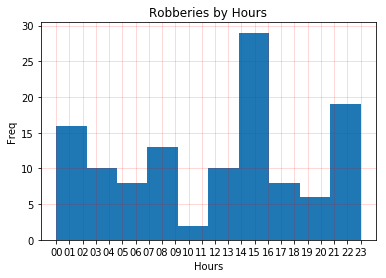

In [14]:
robberies = crime_final[crime_final['OFNS_DESC'] == 'ROBBERY']
crim_tres = crime_final[crime_final['OFNS_DESC'] == 'CRIMINAL TRESPASS']

time_robberies = list(robberies['CMPLNT_FR_TM'])

hours_robberies = []
for t in time_robberies:
    hours_robberies.append(t[0]+t[1])

hours_robberies = sorted(hours_robberies)
plt.hist(hours_robberies)
plt.grid(color='r',linewidth=0.5,alpha=0.3)
plt.xlabel('Hours')
plt.ylabel('Freq')
plt.title('Robberies by Hours')

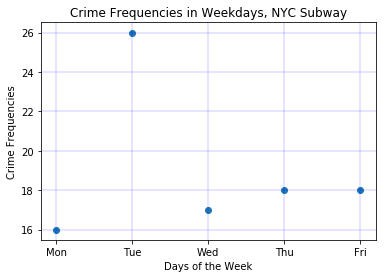

In [15]:
# Crime Frequencies in Weekdays
weekday = crime_final['WEEKDAY']

weekday.value_counts()

weekday = ['Mon','Tue','Wed','Thu','Fri']
week_freq = [16,26,17,18,18]

weekday_dict = {'Mon':16,'Tue':26,'Wed':17,'Thu':18,'Fri':18}

plt.scatter(weekday, week_freq)
plt.xlabel('Days of the Week')
plt.ylabel('Crime Frequencies')
plt.title('Crime Frequencies in Weekdays, NYC Subway')
plt.grid(color='b', linewidth=0.2)
plt.show()